In [116]:
from astropy.table import Table
from astropy.io import fits
from imaka.analysis import plot_stats
import numpy as np
import matplotlib.pyplot as plt
import csv
import numpy as np
import pylab as plt
import scipy.spatial
from astropy.table import Table
import subprocess
import os, pdb
from imaka.reduce import util
from datetime import datetime
from matplotlib import dates as mp_dates
from matplotlib import ticker
import glob
import matplotlib.pyplot as plt
import matplotlib
from imaka.analysis import add_data
from astropy.io import fits
from pandas import read_csv



def filter2wv(filter_label):

    #converts filter label from fits header into wavelength in nanometers 
    
    if type(filter_label)==str:
        if "I" in filter_label:
            return 806
        elif "R" in filter_label:
            return 658
        elif "1_micronlp" in filter_label:
            return 1000
        else: 
            print("Filter not found: defaulting to 500 nm")
            return 500
    else:
        new_array = np.zeros(len(filter_label))
        for i in range(len(filter_label)):
            if "I" in filter_label:
                new_array[i] = 806
            elif "R" in filter_label:
                new_array[i] = 658
            elif "1_micronlp" in filter_label:
                new_array[i] = 1000
            else:
                print("Filter not found: defaulting to 500 nm")
                new_array[i] = 500
        return new_array
        
                

%matplotlib inline

root_dir = "//Users/fatimaabdurrahman/Desktop/Research/"
stats_dir_end = "/FLI/reduce/stats/"

#open files
r1d1_o = root_dir+"RUN3/20170109"+stats_dir_end+"stats_open_mdp.fits"
r1d2_o = root_dir+"RUN3/20170110"+stats_dir_end+"stats_open_mdp.fits"
r1d3_o = root_dir+"RUN3/20170111"+stats_dir_end+"stats_open_mdp.fits"
#r1d4_o = root_dir+"RUN3/20170112"+stats_dir_end+"stats_open_mdp.fits"
r1d5_o = root_dir+"RUN3/20170113"+stats_dir_end+"stats_open1_mdp.fits"
r1d6_o = root_dir+"RUN3/20170113"+stats_dir_end+"stats_open2_mdp.fits"

r2d1_o = root_dir+"RUN4/20170214"+stats_dir_end+"stats_open_mdp.fits"
r2d2_o = root_dir+"RUN4/20170215"+stats_dir_end+"stats_open_mdp.fits"
r2d3_o = root_dir+"RUN4/20170216"+stats_dir_end+"stats_open_mdp.fits"
r2d4_o = root_dir+"RUN4/20170217"+stats_dir_end+"stats_open_mdp.fits"
r2d5_o = root_dir+"RUN4/20170218"+stats_dir_end+"stats_open_mdp.fits"

r3d1_o = root_dir+"RUN5/20170517"+stats_dir_end+"stats_open_mdp_alt.fits"
r3d2_o = root_dir+"RUN5/20170518"+stats_dir_end+"stats_open_mdp_alt.fits"
r3d3_o = root_dir+"RUN5/20170519"+stats_dir_end+"stats_open_mdp_alt.fits"
r3d4_o = root_dir+"RUN5/20170520"+stats_dir_end+"stats_open_mdp_alt.fits"
r3d5_o = root_dir+"RUN5/20170521"+stats_dir_end+"stats_open_mdp_alt.fits"
#r3d6_o = root_dir+"RUN5/20170522"+stats_dir_end+"stats_open_mdp.fits"

open_files = [r1d1_o, r1d2_o, r1d3_o, r1d5_o, r1d5_o, \
             r2d1_o, r2d2_o, r2d3_o, r2d4_o, r2d5_o, \
             r3d1_o, r3d2_o, r3d3_o, r3d4_o, r3d5_o]#, r3d6_o]

#closed files
r1d1_c = root_dir+"RUN3/20170109"+stats_dir_end+"stats_closed_mdp.fits"
r1d2_c = root_dir+"RUN3/20170110"+stats_dir_end+"stats_closed_mdp.fits"
r1d3_c = root_dir+"RUN3/20170111"+stats_dir_end+"stats_closed_mdp.fits"
#r1d4_c = root_dir+"RUN3/20170112"+stats_dir_end+"stats_closed_mdp.fits"
r1d5_c = root_dir+"RUN3/20170113"+stats_dir_end+"stats_closed1_mdp.fits"
r1d6_c = root_dir+"RUN3/20170113"+stats_dir_end+"stats_closed2_mdp.fits"

r2d1_c = root_dir+"RUN4/20170214"+stats_dir_end+"stats_closed_mdp.fits"
r2d2_c = root_dir+"RUN4/20170215"+stats_dir_end+"stats_closed_mdp.fits"
r2d3_c = root_dir+"RUN4/20170216"+stats_dir_end+"stats_closeda_mdp.fits"
r2d4_c = root_dir+"RUN4/20170217"+stats_dir_end+"stats_closeda_mdp.fits"
r2d5_c = root_dir+"RUN4/20170218"+stats_dir_end+"stats_closeda_mdp.fits"

r3d1_c = root_dir+"RUN5/20170517"+stats_dir_end+"stats_closed_mdp.fits"
r3d2_c = root_dir+"RUN5/20170518"+stats_dir_end+"stats_closedA_mdp.fits"
r3d3_c = root_dir+"RUN5/20170519"+stats_dir_end+"stats_closedA_mdp.fits"
r3d4_c = root_dir+"RUN5/20170520"+stats_dir_end+"stats_closedA_mdp.fits"
r3d5_c = root_dir+"RUN5/20170521"+stats_dir_end+"stats_closed_mdp.fits"
#r3d6_c = root_dir+"RUN5/20170522"+stats_dir_end+"stats_closed_mdp.fits"

closed_files = [r1d1_c, r1d2_c, r1d3_c,  r1d5_c, r1d5_c, \
             r2d1_c, r2d2_c, r2d3_c, r2d4_c, r2d5_c, \
             r3d1_c, r3d2_c, r3d3_c, r3d4_c, r3d5_c]#, r3d6_c]

In [37]:
#not all telemetry data is here: 

r1d4_tel = root_dir + "RUN3/20170112" + stats_dir_end + "profile-data_20170112.fits"

r2d1_tel = root_dir + "RUN4/20170214" + stats_dir_end + "profile-data_20170214-noTT.fits"
r2d2_tel = root_dir + "RUN4/20170215" + stats_dir_end + "profile-data_20170215-noTT.fits"
r2d3_tel = root_dir + "RUN4/20170216" + stats_dir_end + "profile-data_20170216-noTT.fits"
r2d4_tel = root_dir + "RUN4/20170217" + stats_dir_end + "profile-data_20170217-noTT.fits"
r2d5_tel = root_dir + "RUN4/20170218" + stats_dir_end + "profile-data_20170218-noTT.fits"

r3d1_tel = root_dir + "RUN5/20170517" + stats_dir_end + "profile-data_20170517-noTT.fits"
r3d2_tel = root_dir + "RUN5/20170518" + stats_dir_end + "profile-data_20170518-noTT.fits"
r3d3_tel = root_dir + "RUN5/20170519" + stats_dir_end + "profile-data_20170519-noTT.fits"
r3d4_tel = root_dir + "RUN5/20170520" + stats_dir_end + "profile-data_20170520-noTT.fits"
r3d5_tel = root_dir + "RUN5/20170521" + stats_dir_end + "profile-data_20170521-noTT.fits"
#r3d6_tel = root_dir + "RUN5/20170522" + stats_dir_end + "profile-data_20170522-noTT.fits"

tel_files = [r1d4_tel, \
            r2d1_tel, r2d2_tel, r2d3_tel, r2d4_tel, \
            r3d1_tel, r3d2_tel, r3d3_tel, r3d4_tel, r3d5_tel]#, r3d6_tel]

int_see = []
free_atm = []

for file in tel_files:
    data = fits.getdata(file)
    int_see.append(data[:,1]) #compares to dimm
    free_atm.append(data[:,-1]) #compares to mass

all_int_see = np.concatenate(int_see)
all_free_atm = np.concatenate(free_atm)

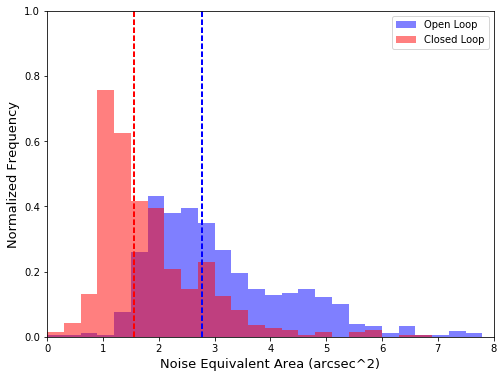

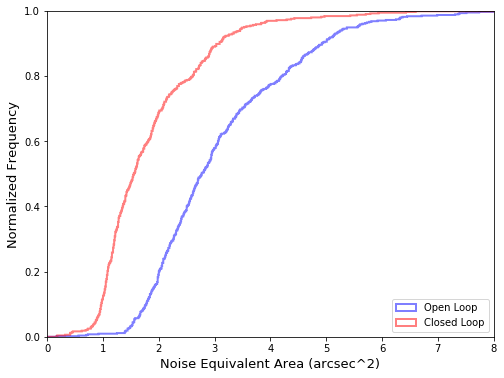

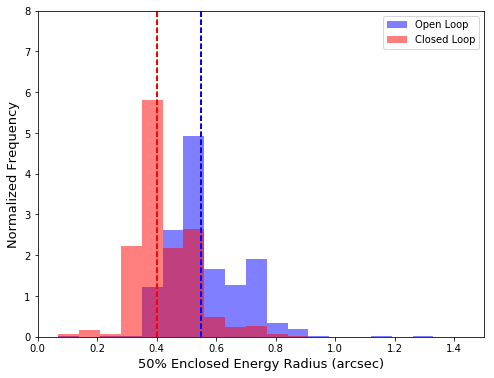

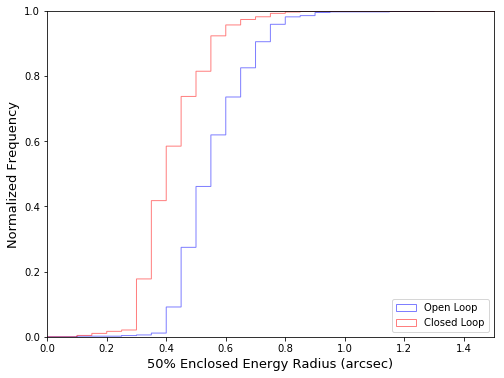

In [39]:
open_nea_tables = []
open_EE80_tables = []
open_emp_fwhm = []
open_filter = []
open_bin = []
mass = []
dimm = []

scale = 0.04

for file in open_files:
    table = Table.read(file)
    open_nea_tables.append(np.array(table['NEA']))
    open_EE80_tables.append(np.array(table['EE50']))
    open_emp_fwhm.append(np.array(table['emp_fwhm']))
    mass.append(np.array(table['MASS']))
    dimm.append(np.array(table['DIMM']))
    if 2.0 in table[0] or 3.0 in table[0]:
        open_filter.append(np.array(table['FILTER']))
        open_bin.append(np.array(table['BINFAC']))
    else:
        bin_ar = [3.0 for x in range(len(table))]
        if 'r1d5' in file:
            filt_ar = ["I" for x in range(len(table))]
        else:
            filt_ar = ["R" for x in range(len(table))]
        open_filter.append(filt_ar)
        open_bin.append(bin_ar)
    
    
closed_nea_tables = []
closed_EE80_tables = []
closed_emp_fwhm = []
closed_filter = []
closed_bin = []

for file in closed_files:
    table = Table.read(file)
    closed_nea_tables.append(np.array(table['NEA']))
    closed_EE80_tables.append(np.array(table['EE50']))
    closed_emp_fwhm.append(np.array(table['emp_fwhm']))
    mass.append(np.array(table['MASS']))
    dimm.append(np.array(table['DIMM']))
    if 2.0 in table[0] or 3.0 in table[0]:
        closed_filter.append(np.array(table['FILTER']))
        closed_bin.append(np.array(table['BINFAC']))
    else:
        bin_ar = [3.0 for x in range(len(table))]
        if 'r1d5' in file:
            filt_ar = ["I" for x in range(len(table))]
        else:
            filt_ar = ["R" for x in range(len(table))]
        closed_filter.append(filt_ar)
        closed_bin.append(bin_ar)
    
all_open_nea = np.concatenate(open_nea_tables)
all_closed_nea = np.concatenate(closed_nea_tables)
all_open_EE80 = np.concatenate(open_EE80_tables)
all_closed_EE80 = np.concatenate(closed_EE80_tables)
all_open_emp_fwhm = np.concatenate(open_emp_fwhm)
all_closed_emp_fwhm = np.concatenate(closed_emp_fwhm)
all_mass = np.concatenate(mass)
all_dimm = np.concatenate(dimm)
all_closed_bin = np.concatenate(closed_bin)
all_closed_filter = plot_stats.filter2wv(np.concatenate(closed_filter))
all_open_bin = np.concatenate(open_bin)
all_open_filter = plot_stats.filter2wv(np.concatenate(open_filter))
all_open_fwhm_wv = all_open_emp_fwhm  * all_open_bin * 0.04
all_closed_fwhm_wv = all_closed_emp_fwhm * all_closed_bin * 0.04
all_open_fwhm = all_open_emp_fwhm * ((all_open_filter/500)**0.2) * all_open_bin * 0.04
all_closed_fwhm = all_closed_emp_fwhm * ((all_closed_filter/500)**0.2) * all_closed_bin * 0.04

# Plot
max_val = np.amax(all_open_nea)
bins_set = np.arange(0, max_val, 0.3)
bins_set_cdf = np.arange(0, max_val, 0.01)

max_val_EE = np.amax(all_open_EE80)
bins_set_EE = np.arange(0, max_val_EE, max_val_EE/30)
bins_set_EE_cdf = np.arange(0, max_val_EE, 0.001)

# # NEA PDF
plt.figure(1, figsize = (8,6))
plt.hist(all_open_nea,  alpha=0.5, bins=bins_set, color='blue', label='Open Loop', normed=1);
plt.hist(all_closed_nea,  alpha=0.5, bins=bins_set, color='red', label='Closed Loop', normed=1);
plt.ylabel('Normalized Frequency', fontsize=13)
plt.xlabel('Noise Equivalent Area (arcsec^2)', fontsize=13)
plt.axis([0, 8, 0, 1])
plt.legend()
plt.axvline(np.median(all_open_nea), color='b', linestyle='dashed', linewidth=2, label='Open Median')
plt.axvline(np.median(all_closed_nea), color='r', linestyle='dashed', linewidth=2, label='Closed Median')
plt.savefig('NEA PDF')

# # NEA CDF
plt.figure(2, figsize = (8,6))
plt.hist(all_open_nea,  alpha=0.5, bins=bins_set_cdf, color='blue', linewidth=2, label='Open Loop', cumulative=True, normed=1, histtype='step');
plt.hist(all_closed_nea,  alpha=0.5, bins=bins_set_cdf, color='red', linewidth=2, label='Closed Loop', cumulative=True, normed=1, histtype='step');
plt.xlabel('Noise Equivalent Area (arcsec^2)', fontsize=13)
plt.ylabel('Normalized Frequency', fontsize=13)
plt.axis([0, 8, 0, 1])
plt.legend(loc=4)
plt.savefig('NEA CDF')

# #EE80 PDF
plt.figure(3, figsize = (8,6))
plt.hist(all_open_EE80, normed=1, alpha=0.5, bins=bins_set_EE, color='blue', label='Open Loop');
plt.hist(all_closed_EE80, normed=1, alpha=0.5, bins=bins_set_EE, color='red', label='Closed Loop');
plt.xlabel('50% Enclosed Energy Radius (arcsec)', fontsize=13)
plt.ylabel('Normalized Frequency', fontsize=13)
plt.axis([0, 1.5, 0, 8])
plt.legend()
plt.axvline(np.median(all_open_EE80), color='b', linestyle='dashed', linewidth=2, label='Open Median')
plt.axvline(np.median(all_closed_EE80), color='r', linestyle='dashed', linewidth=2, label='Closed Median')
plt.savefig('EE50 PDF')

# # EE80 CDF
plt.figure(4, figsize = (8,6))
plt.hist(all_open_EE80,  alpha=0.5, bins=np.arange(0, max_val_EE, 0.001), color='blue', label='Open Loop', cumulative=True, normed=1, histtype='step');
plt.hist(all_closed_EE80,  alpha=0.5, bins=np.arange(0, max_val_EE, 0.001), color='red', label='Closed Loop', cumulative=True, normed=1, histtype='step');
plt.xlabel('50% Enclosed Energy Radius (arcsec)', fontsize=13)
plt.ylabel('Normalized Frequency', fontsize=13)
plt.axis([0, 1.5, 0, 1]);
plt.legend(loc=4)
plt.savefig('EE50 CDF')




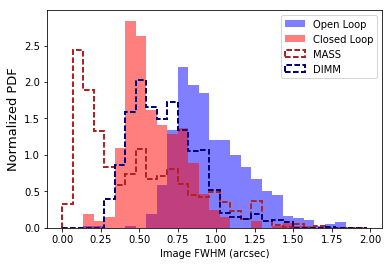

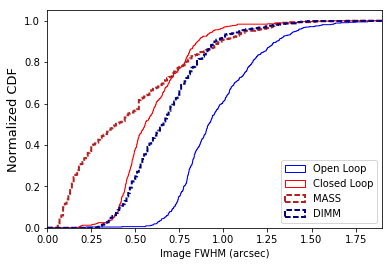

In [41]:
# FWHM vs mass/dimm
max_val_fwhm = np.amax(all_open_fwhm)
bins_set_fwhm = np.arange(0, max_val_fwhm, max_val_fwhm/30)
bins_set_fwhm_cdf = np.arange(0, max_val_fwhm, 0.001)#max_val_fwhm/260)

print('open:' np.median(all_open_fwhm))

plt.figure(1, figsize = (6,4))
#plt.subplot(1,2,1)
plt.hist(all_open_fwhm, bins=bins_set_fwhm, color='blue', label='Open Loop', normed=1, alpha=0.5);
plt.hist(all_closed_fwhm, bins=bins_set_fwhm, color='red', label='Closed Loop', normed=1, alpha=0.5);
plt.hist(all_mass,  bins=bins_set_fwhm, color='Firebrick', label='MASS',linestyle=('dashed'), linewidth=2, normed=1, histtype='step')
plt.hist(all_dimm,  bins=bins_set_fwhm, color='Navy', label='DIMM', linestyle=('dashed'), linewidth=2, normed=1, histtype='step')
plt.ylabel('Normalized PDF', fontsize=13)
#plt.axis([0, 1.9, 0, 1.05])
#plt.axvline(np.median(all_open_fwhm), color='b', linestyle='dashed', linewidth=2, label='Open Median')
#plt.axvline(np.median(all_closed_fwhm), color='r', linestyle='dashed', linewidth=2, label='Closed Median')
plt.legend()
plt.xlabel('Image FWHM (arcsec)')
plt.savefig('Open v Closed PDF')


plt.figure(2, figsize=(6,4))
#plt.subplot(1,2,2)
plt.hist(all_open_fwhm, bins=bins_set_fwhm_cdf, color='blue', label='Open Loop', normed=1, cumulative=True, histtype='step');
plt.hist(all_closed_fwhm, bins=bins_set_fwhm_cdf, color='red', label='Closed Loop', normed=1, cumulative=True, histtype='step');
plt.hist(all_mass,  bins=bins_set_fwhm_cdf, color='Firebrick', label='MASS',linestyle=('dashed'), linewidth=2, normed=1, histtype='step', cumulative=True)
plt.hist(all_dimm,  bins=bins_set_fwhm_cdf, color='Navy', label='DIMM', linestyle=('dashed'), linewidth=2, normed=1, histtype='step', cumulative=True)
plt.ylabel('Normalized CDF', fontsize=13)
plt.axis([0, 1.9, 0, 1.05])
plt.legend(loc=4)
plt.xlabel('Image FWHM (arcsec)')

#plt.suptitle("Overall characterization of imaka observing nights (RUN3,4,5) from MASS/DIMM perspective")
plt.savefig('Open v Closed CDP')



In [177]:
print('open:', np.median(all_open_fwhm))
print('closed:', np.median(all_closed_fwhm))
print('dimm:', np.median(all_dimm))
print('mass:', np.median(all_mass))
print('o/c', np.median(all_closed_fwhm)/np.median(all_open_fwhm))
print('d/m', np.median(all_mass)/np.median(all_dimm))
print('dimm med', np.median(all_mass), 'std:', np.std(all_mass))
print('tel med', np.median(all_free_atm), 'std:', np.std(all_free_atm))


open: 0.917697537741
closed: 0.555304111062
dimm: 0.66
mass: 0.39
o/c 0.605105809076
d/m 0.590909090909
dimm med 0.39 std: 0.353529793542
tel med 0.407849 std: 0.185605


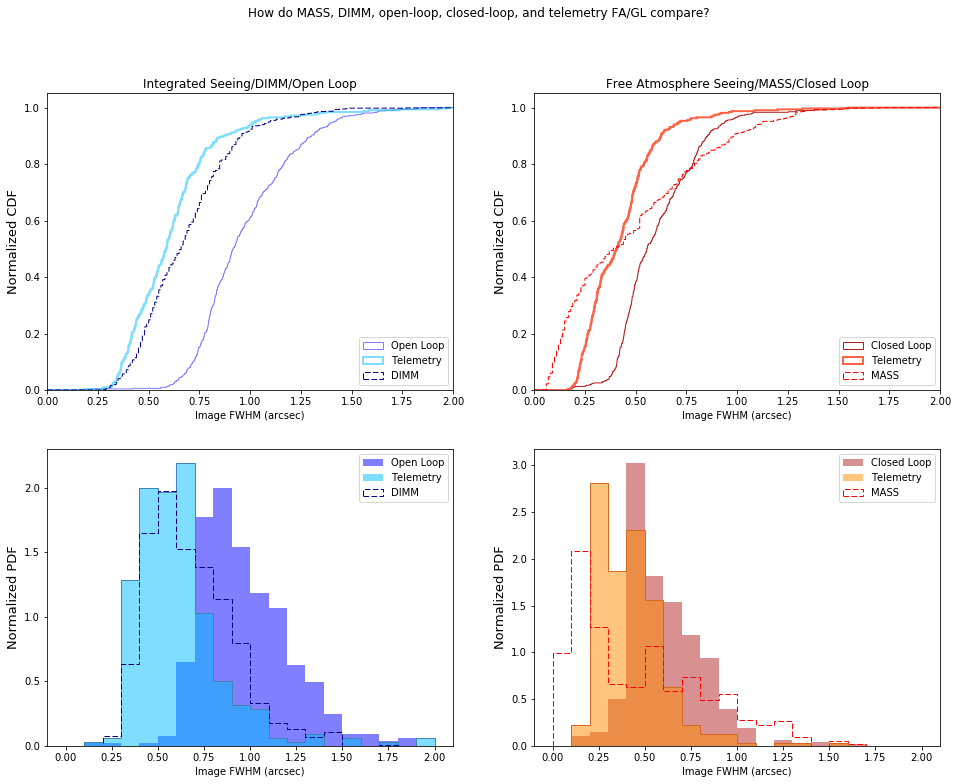

In [164]:
# FWHM vs mass/dimm
max_val_fwhm = np.amax(all_open_fwhm)
bins_set_fwhm = np.arange(0, max_val_fwhm, .1)#max_val_fwhm/30)
bins_set_fwhm_cdf = np.arange(0, max_val_fwhm, .001)#max_val_fwhm/260)

plt.figure(1, figsize = (16,12))
plt.suptitle("How do MASS, DIMM, open-loop, closed-loop, and telemetry FA/GL compare?")

plt.subplot(2,2,1)
plt.title('Integrated Seeing/DIMM/Open Loop')
plt.hist(all_open_fwhm, bins=bins_set_fwhm_cdf, color='blue', label='Open Loop', normed=1, alpha=0.5, cumulative=True, histtype='step');
plt.hist(all_int_see, bins=bins_set_fwhm_cdf, color='#00bfff', linewidth=2, label='Telemetry', normed=1, alpha=0.5, cumulative=True, histtype='step')
plt.hist(all_dimm,  bins=bins_set_fwhm_cdf, color='Navy', label='DIMM', linestyle=('dashed'), normed=1,cumulative=True, histtype='step')
plt.ylabel('Normalized CDF', fontsize=13); plt.axis([0, 2, 0, 1.05]); plt.legend(loc=4)
plt.xlabel('Image FWHM (arcsec)')

plt.subplot(2,2,2)
plt.title('Free Atmosphere Seeing/MASS/Closed Loop')
plt.hist(all_closed_fwhm, bins=bins_set_fwhm_cdf, color='Firebrick', label='Closed Loop', normed=1,cumulative=True, histtype='step');
plt.hist(all_free_atm, bins=bins_set_fwhm_cdf, color='Tomato', linewidth=2, label='Telemetry', normed=1,  cumulative=True, histtype='step')
plt.hist(all_mass,  bins=bins_set_fwhm_cdf, color='Red', label='MASS', linestyle=('dashed'), normed=1,cumulative=True, histtype='step')
plt.ylabel('Normalized CDF', fontsize=13); plt.axis([0, 2, 0, 1.05]); plt.legend(loc=4)
plt.xlabel('Image FWHM (arcsec)')

plt.subplot(2,2,3)
plt.hist(all_open_fwhm, bins=bins_set_fwhm, color='blue', label='Open Loop', normed=1, alpha=0.5);
plt.hist(all_int_see, bins=bins_set_fwhm, color='#00bfff', label='Telemetry', normed=1, alpha=0.5)
plt.hist(all_int_see, bins=bins_set_fwhm, color='#4682b4', normed=1, histtype='step')
plt.hist(all_dimm,  bins=bins_set_fwhm, color='Navy', label='DIMM', linestyle=('dashed'), normed=1, histtype='step')
plt.ylabel('Normalized PDF', fontsize=13)
plt.legend()
plt.xlabel('Image FWHM (arcsec)')

plt.subplot(2,2,4)
plt.hist(all_closed_fwhm, bins=bins_set_fwhm, color='Firebrick', label='Closed Loop', normed=1, alpha=0.5);
plt.hist(all_free_atm, bins=bins_set_fwhm, color='#ff8c00', label='Telemetry', normed=1, alpha=0.5)
plt.hist(all_free_atm, bins=bins_set_fwhm, color='Chocolate', normed=1, histtype='step')
plt.hist(all_mass,  bins=bins_set_fwhm, color='Red', label='MASS', linestyle=('dashed'), normed=1, histtype='step')
plt.ylabel('Normalized PDF', fontsize=13)
plt.legend()
plt.xlabel('Image FWHM (arcsec)')

plt.savefig('comparison_massdimm_telem')


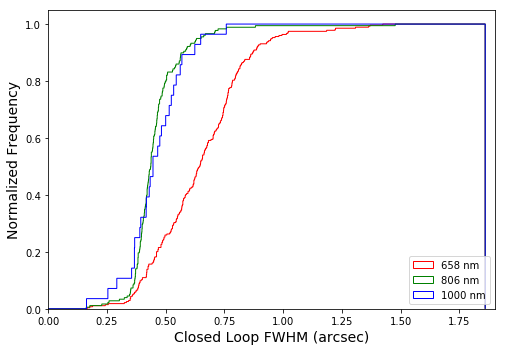

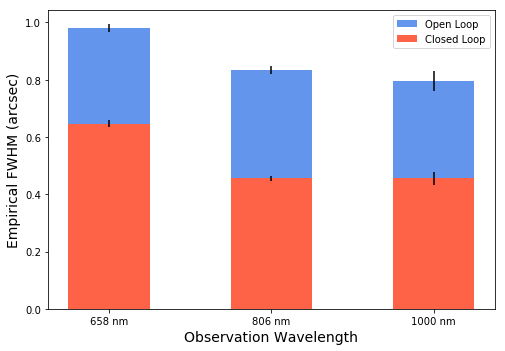

In [22]:
nm658_c = []; nm658_o = []
nm806_c = []; nm806_o = []
nm1000_c = []; nm1000_o = []

for i in range(len(all_open_filter)):
    if all_open_filter[i] == 658:
        nm658_o.append(all_open_fwhm_wv[i])
    if all_open_filter[i] == 806:
        nm806_o.append(all_open_fwhm_wv[i])
    if all_open_filter[i] == 1000:
        nm1000_o.append(all_open_fwhm_wv[i])
        
        
for i in range(len(all_closed_filter)):
    if all_closed_filter[i] == 658:
        nm658_c.append(all_closed_fwhm_wv[i])
    if all_closed_filter[i] == 806:
        nm806_c.append(all_closed_fwhm_wv[i])
    if all_closed_filter[i] == 1000:
        nm1000_c.append(all_closed_fwhm_wv[i])
        
nm658_c_ave = np.mean(nm658_c)
nm806_c_ave = np.mean(nm806_c)
nm1000_c_ave = np.mean(nm1000_c)
nm658_c_std = np.std(nm658_c)/np.sqrt(len(nm658_c))
nm806_c_std = np.std(nm806_c)/np.sqrt(len(nm806_c))
nm1000_c_std = np.std(nm1000_c)/np.sqrt(len(nm1000_c))

nm658_o_ave = np.mean(nm658_o)
nm806_o_ave = np.mean(nm806_o)
nm1000_o_ave = np.mean(nm1000_o)
nm658_o_std = np.std(nm658_o)/np.sqrt(len(nm658_o))
nm806_o_std = np.std(nm806_o)/np.sqrt(len(nm806_o))
nm1000_o_std = np.std(nm1000_o)/np.sqrt(len(nm1000_o))

      
max_val_fwhm = np.amax(all_open_fwhm_wv)
bins_set_fwhm = np.arange(0, max_val_fwhm, max_val_fwhm/30)
bins_set_fwhm_cdf = np.arange(0, max_val_fwhm, 0.001)
        
plt.figure(1, figsize=(8,5.5))
plt.hist(nm658_c, bins=bins_set_fwhm_cdf, color='red', normed=True, cumulative=True, histtype='step', label='658 nm');
plt.hist(nm806_c, bins=bins_set_fwhm_cdf, color='green', normed=True, cumulative=True, histtype='step', label='806 nm');
plt.hist(nm1000_c, bins=bins_set_fwhm_cdf, color='blue', normed=True, cumulative=True, histtype='step', label='1000 nm');
plt.legend(loc=4)
plt.axis([0,1.9,0,1.05])
plt.xlabel('Closed Loop FWHM (arcsec)', fontsize=14)
plt.ylabel('Normalized Frequency', fontsize=14)
#plt.title('Wavelength Comparison CDF')
plt.savefig('Wavelength CDF')

plt.figure(2, figsize=(8,5.5))
N = 3
closed_means = (nm658_c_ave, nm806_c_ave, nm1000_c_ave)
closed_std = (nm658_c_std, nm806_c_std, nm1000_c_std)
open_means = (nm658_o_ave, nm806_o_ave, nm1000_o_ave)
open_std = (nm658_o_std, nm806_o_std, nm1000_o_std)

ind = np.arange(N)  # the x locations for the groups
width = 0.5       # the width of the bars
plt.bar(ind, open_means, width, color='#6495ed', yerr=open_std, label="Open Loop")
plt.bar(ind, closed_means, width, color='Tomato', yerr=closed_std, tick_label=['658 nm', '806 nm', '1000 nm'], label="Closed Loop")
plt.xlabel('Observation Wavelength', fontsize=14)
plt.ylabel('Empirical FWHM (arcsec)', fontsize=14)
plt.legend()
#plt.title('FWHM Averages in Different Filters')
#plt.axis([-0.5, 2.5, 0, 1.2])
plt.savefig('Wavelength Bars')


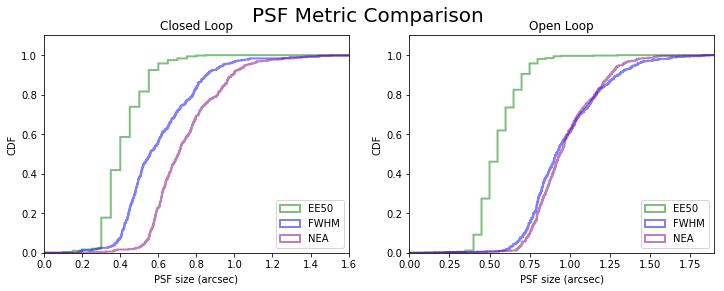

In [211]:
plt.figure(1, figsize=(12, 4)); plt.suptitle('PSF Metric Comparison', fontsize=20)
plt.subplot(121)
plt.hist(all_closed_EE80, color='Green', linewidth=2, bins = np.arange(0, 1.7, 0.001) , alpha=0.5, cumulative=True, histtype='step', normed=True, label='EE50')
plt.hist(all_closed_fwhm, color='Blue', linewidth=2, bins = np.arange(0, 1.7, 0.001), alpha=0.5, cumulative=True, histtype='step', normed=True, label='FWHM')
plt.hist(np.sqrt(all_closed_nea/np.pi), color='Purple', linewidth=2, bins = np.arange(0, 1.7, 0.001) , alpha=0.5, cumulative=True, histtype='step', normed=True, label='NEA');
plt.legend(loc=4); plt.axis([0, 1.6, 0, 1.1]); plt.xlabel('PSF size (arcsec)'); plt.ylabel('CDF'); plt.title('Closed Loop')

plt.subplot(122)
plt.hist(all_open_EE80, color='Green', linewidth=2, bins = np.arange(0, 2, 0.001) , alpha=0.5, cumulative=True, histtype='step', normed=True, label='EE50')
plt.hist(all_open_fwhm, color='Blue', linewidth=2, bins = np.arange(0, 2, 0.001), alpha=0.5, cumulative=True, histtype='step', normed=True, label='FWHM')
plt.hist(np.sqrt(all_open_nea/np.pi), color='Purple', linewidth=2, bins = np.arange(0, 2, 0.001) , alpha=0.5, cumulative=True, histtype='step', normed=True, label='NEA');
plt.legend(loc=4); plt.axis([0, 1.9, 0, 1.1]); plt.xlabel('PSF size (arcsec)'); plt.ylabel('CDF'); plt.title('Open Loop')


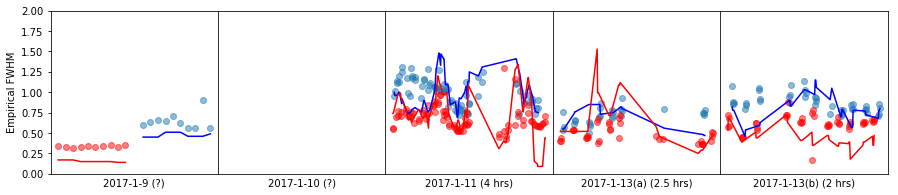

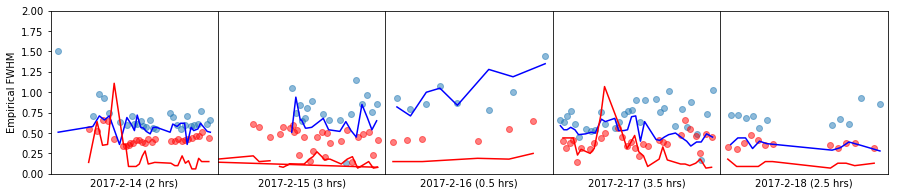

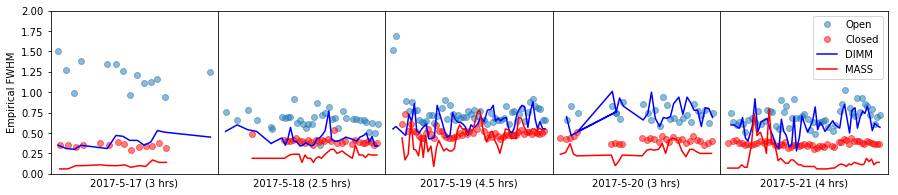

In [162]:
all_open = [r1d1_o, r1d2_o, r1d3_o, r1d5_o, r1d6_o]
all_closed = [r1d1_c, r1d2_c, r1d3_c, r1d5_c, r1d6_c]
index = [1,2,3,4,5]

plt.figure(1, figsize=(15,3))
for i in range(len(all_open)):
    ind=index[i]
    #Read in data
    comp_col = 'emp_fwhm'
        #Read in data
    stats1 = Table.read(all_open[i])
    stats2 = Table.read(all_closed[i])

    time1, date1, data1, data2, err1, err2 = add_data.match_cols(all_open[i], all_open[i], comp_col)
    time2, date2, data1, data2, err1, err2 = add_data.match_cols(all_closed[i], all_closed[i], comp_col)

    calib1 = []; calib2=[]

    if i == 5:
        filt_ar = ["I" for x in range(len(table))]
    else:
        filt_ar = ["R" for x in range(len(table))]
    
        #Get mass/dimm data
    mass = stats2['MASS']
    dimm = stats1['DIMM']
    for i in range(len(stats1)):
        wvln = filter2wv(filt_ar)
        scale = .04 * 3
        factor = ((500/wvln)**0.2) * scale
        calib1.append(factor)

    for i in range(len(stats2)):
        wvln = filter2wv(filt_ar)
        scale = .04 * 3
        factor = ((500/wvln)**0.2) * scale
        calib2.append(factor)


    open_err = np.array(stats1['emp_fwhm_std']) * np.array(calib1)[:,0]
    closed_err = np.array(stats2['emp_fwhm_std']) * np.array(calib2)[:,0]

        #Plot fwhm and seeing vs time
    times1 = []
    for i in range(len(time1)):
        string = str(date1[i])+str(time1[i])
        dt_obj = datetime.strptime(string, "b'%Y-%m-%d'b'%H:%M:%S'")
        times1.append(dt_obj)

    times2 = []
    for i in range(len(time2)):
        string = str(date2[i])+str(time2[i])
        dt_obj = datetime.strptime(string, "b'%Y-%m-%d'b'%H:%M:%S'")
        times2.append(dt_obj)

    plt.subplot(1,5,ind)
    #plt.errorbar(times1, np.array(stats1['emp_fwhm'])*np.array(calib1)[:,0], yerr=open_err, fmt='o', label="Open")
    #plt.errorbar(times2, np.array(stats2['emp_fwhm'])*np.array(calib2)[:,0], yerr=closed_err, fmt='ro', label="Closed")
    plt.plot(times1, np.array(stats1['emp_fwhm'])*np.array(calib1)[:,0], 'o', alpha=0.5, label="Open")
    plt.plot(times2, np.array(stats2['emp_fwhm'])*np.array(calib2)[:,0], 'ro', alpha=0.5, label="Closed")
    plt.plot(times1, dimm, 'b-')
    plt.plot(times2, mass, 'r-')
    if ind == 1:
        plt.ylabel('Empirical FWHM')
        plt.xlabel('2017-1-9 (?)')
    else: 
        plt.yticks([])
    if ind ==2:
        plt.xlim(a,b)
        plt.xlabel('2017-1-10 (?)')
    if ind == 3:
        plt.xlabel("UTC Time")        
        plt.xlabel('2017-1-11 (4 hrs)')
    if ind == 4:
        plt.xlabel('2017-1-13(a) (2.5 hrs)')
    if ind==5:
        plt.xlabel('2017-1-13(b) (2 hrs)')

    plt.xticks(rotation=35)
    plt.ylim(0, 2)
    plt.xticks([])
    plt.gca().xaxis.set_major_formatter(mp_dates.DateFormatter('%H:%M'))
plt.subplots_adjust(wspace=0, hspace=0)
    #plt.savefig(plots_dir + 'fwhm_v_time' + '.png')


############################################################
all_open = [r2d1_o, r2d2_o, r2d3_o, r2d4_o, r2d5_o]
all_closed = [r2d1_c, r2d2_c, r2d3_c, r2d4_c, r2d5_c]
index = [1,2,3,4,5]

plt.figure(2, figsize=(15,3))
for i in range(len(all_open)):
    ind=index[i]
    #Read in data
    comp_col = 'emp_fwhm'
        #Read in data
    stats1 = Table.read(all_open[i])
    stats2 = Table.read(all_closed[i])

    time1, date1, data1, data2, err1, err2 = add_data.match_cols(all_open[i], all_open[i], comp_col)
    time2, date2, data1, data2, err1, err2 = add_data.match_cols(all_closed[i], all_closed[i], comp_col)

    calib1 = []; calib2=[]

        #Get mass/dimm data
    mass = stats2['MASS']
    dimm = stats1['DIMM']
    for i in range(len(stats1)):
        wvln = filter2wv(stats1['FILTER'][i])
        scale = .04 * stats1['BINFAC'][i]
        factor = ((500/wvln)**0.2) * scale
        calib1.append(factor)

    for i in range(len(stats2)):
        wvln = filter2wv(stats2['FILTER'][i])
        scale = .04 * stats2['BINFAC'][i]
        factor = ((500/wvln)**0.2) * scale
        calib2.append(factor)


    open_err = np.array(stats1['emp_fwhm_std']) * np.array(calib1)[:,0]
    closed_err = np.array(stats2['emp_fwhm_std']) * np.array(calib2)[:,0]

        #Plot fwhm and seeing vs time
    times1 = []
    for i in range(len(time1)):
        string = str(date1[i])+str(time1[i])
        dt_obj = datetime.strptime(string, "b'%Y-%m-%d'b'%H:%M:%S'")
        times1.append(dt_obj)

    times2 = []
    for i in range(len(time2)):
        string = str(date2[i])+str(time2[i])
        dt_obj = datetime.strptime(string, "b'%Y-%m-%d'b'%H:%M:%S'")
        times2.append(dt_obj)

    plt.subplot(1,5,ind)
    #plt.errorbar(times1, np.array(stats1['emp_fwhm'])*np.array(calib1)[:,0], yerr=open_err, fmt='o', label="Open")
    #plt.errorbar(times2, np.array(stats2['emp_fwhm'])*np.array(calib2)[:,0], yerr=closed_err, fmt='ro', label="Closed")
    plt.plot(times1, np.array(stats1['emp_fwhm'])*np.array(calib1)[:,0], 'o', alpha=0.5, label="Open")
    plt.plot(times2, np.array(stats2['emp_fwhm'])*np.array(calib2)[:,0], 'ro', alpha=0.5, label="Closed")
    plt.plot(times1, dimm, 'b-')
    plt.plot(times2, mass, 'r-')
    if ind == 1:
        plt.ylabel('Empirical FWHM')
        plt.xlabel('2017-2-14 (2 hrs)')
    else: 
        plt.yticks([])
    if ind == 2:
        plt.xlabel('2017-2-15 (3 hrs)')
    if ind == 3:
        plt.xlabel("UTC Time")
        plt.xlabel('2017-2-16 (0.5 hrs)')
    if ind == 4:
        plt.xlabel('2017-2-17 (3.5 hrs)')
    if ind==5:
        plt.xlabel('2017-2-18 (2.5 hrs)')
    if ind ==2:
        plt.xlim(a,b)

    plt.xticks(rotation=35)
    plt.ylim(0, 2)
    plt.xticks([])
    plt.gca().xaxis.set_major_formatter(mp_dates.DateFormatter('%H:%M'))
plt.subplots_adjust(wspace=0, hspace=0)
    #plt.savefig(plots_dir + 'fwhm_v_time' + '.png')


#######################################################

all_open = [r3d1_o, r3d2_o, r3d3_o, r3d4_o, r3d5_o]
all_closed = [r3d1_c, r3d2_c, r3d3_c, r3d4_c, r3d5_c]
index = [1,2,3,4,5]

plt.figure(3, figsize=(15,3))
for i in range(len(all_open)):
    ind=index[i]
    #Read in data
    comp_col = 'emp_fwhm'
        #Read in data
    stats1 = Table.read(all_open[i])
    stats2 = Table.read(all_closed[i])

    time1, date1, data1, data2, err1, err2 = add_data.match_cols(all_open[i], all_open[i], comp_col)
    time2, date2, data1, data2, err1, err2 = add_data.match_cols(all_closed[i], all_closed[i], comp_col)

    calib1 = []; calib2=[]

        #Get mass/dimm data
    mass = stats2['MASS']
    dimm = stats1['DIMM']
    for i in range(len(stats1)):
        wvln = filter2wv(stats1['FILTER'][i])
        scale = .04 * stats1['BINFAC'][i]
        factor = ((500/wvln)**0.2) * scale
        calib1.append(factor)

    for i in range(len(stats2)):
        wvln = filter2wv(stats2['FILTER'][i])
        scale = .04 * stats2['BINFAC'][i]
        factor = ((500/wvln)**0.2) * scale
        calib2.append(factor)


    open_err = np.array(stats1['emp_fwhm_std']) * np.array(calib1)[:,0]
    closed_err = np.array(stats2['emp_fwhm_std']) * np.array(calib2)[:,0]

        #Plot fwhm and seeing vs time
    times1 = []
    for i in range(len(time1)):
        string = str(date1[i])+str(time1[i])
        dt_obj = datetime.strptime(string, "b'%Y-%m-%d'b'%H:%M:%S'")
        times1.append(dt_obj)

    times2 = []
    for i in range(len(time2)):
        string = str(date2[i])+str(time2[i])
        dt_obj = datetime.strptime(string, "b'%Y-%m-%d'b'%H:%M:%S'")
        times2.append(dt_obj)

    plt.subplot(1,5,ind)
    #plt.errorbar(times1, np.array(stats1['emp_fwhm'])*np.array(calib1)[:,0], yerr=open_err, fmt='o', label="Open")
    #plt.errorbar(times2, np.array(stats2['emp_fwhm'])*np.array(calib2)[:,0], yerr=closed_err, fmt='ro', label="Closed")
    plt.plot(times1, np.array(stats1['emp_fwhm'])*np.array(calib1)[:,0], 'o', alpha=0.5, label="Open")
    plt.plot(times2, np.array(stats2['emp_fwhm'])*np.array(calib2)[:,0], 'ro', alpha=0.5, label="Closed")

    plt.plot(times1, dimm, 'b-')
    plt.plot(times2, mass, 'r-')
    if ind == 1:
        plt.ylabel('Empirical FWHM')
        plt.xlabel('2017-5-17 (3 hrs)')
    else: 
        plt.yticks([])
    if ind == 2:
        plt.xlabel('2017-5-18 (2.5 hrs)')
    if ind == 3:
        plt.xlabel('2017-5-19 (4.5 hrs)')
    if ind == 4:
        plt.xlabel('2017-5-20 (3 hrs)')
    if ind==5:
        plt.legend()
        plt.xlabel('2017-5-21 (4 hrs)')
    plt.xticks(rotation=35)
    plt.ylim(0, 2)
    plt.xticks([])
    plt.gca().xaxis.set_major_formatter(mp_dates.DateFormatter('%H:%M'))
plt.subplots_adjust(wspace=0, hspace=0)
    #plt.savefig(plots_dir + 'fwhm_v_time' + '.png')
